In [ ]:
#WordCloud for iNaturalist project descriptions
  
# importing modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import re
from stop_words import get_stop_words

In [ ]:
def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext
  

In [3]:
# Read projects file  
df = pd.read_csv(r"iNatProject.csv", encoding ="utf-8") 
  

In [4]:
comment_words = '' 
#stopwords = set(STOPWORDS) 
#stopwords.update(["de", "la", "bioblitz","will","que","se",""])
stopwords = get_stop_words('en')
stopwordsES = get_stop_words('es')
#stopwords = set(stopwords)


In [7]:
stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

In [ ]:
stopwords.extend(stopwordsES)

In [ ]:
stopwords = set(stopwords)

In [22]:
stopwords.add('bioblitz')
stopwords.add('https')
stopwords.add('www')
stopwords.add('org')
stopwords.add('inaturalist')
stopwords.add('project')

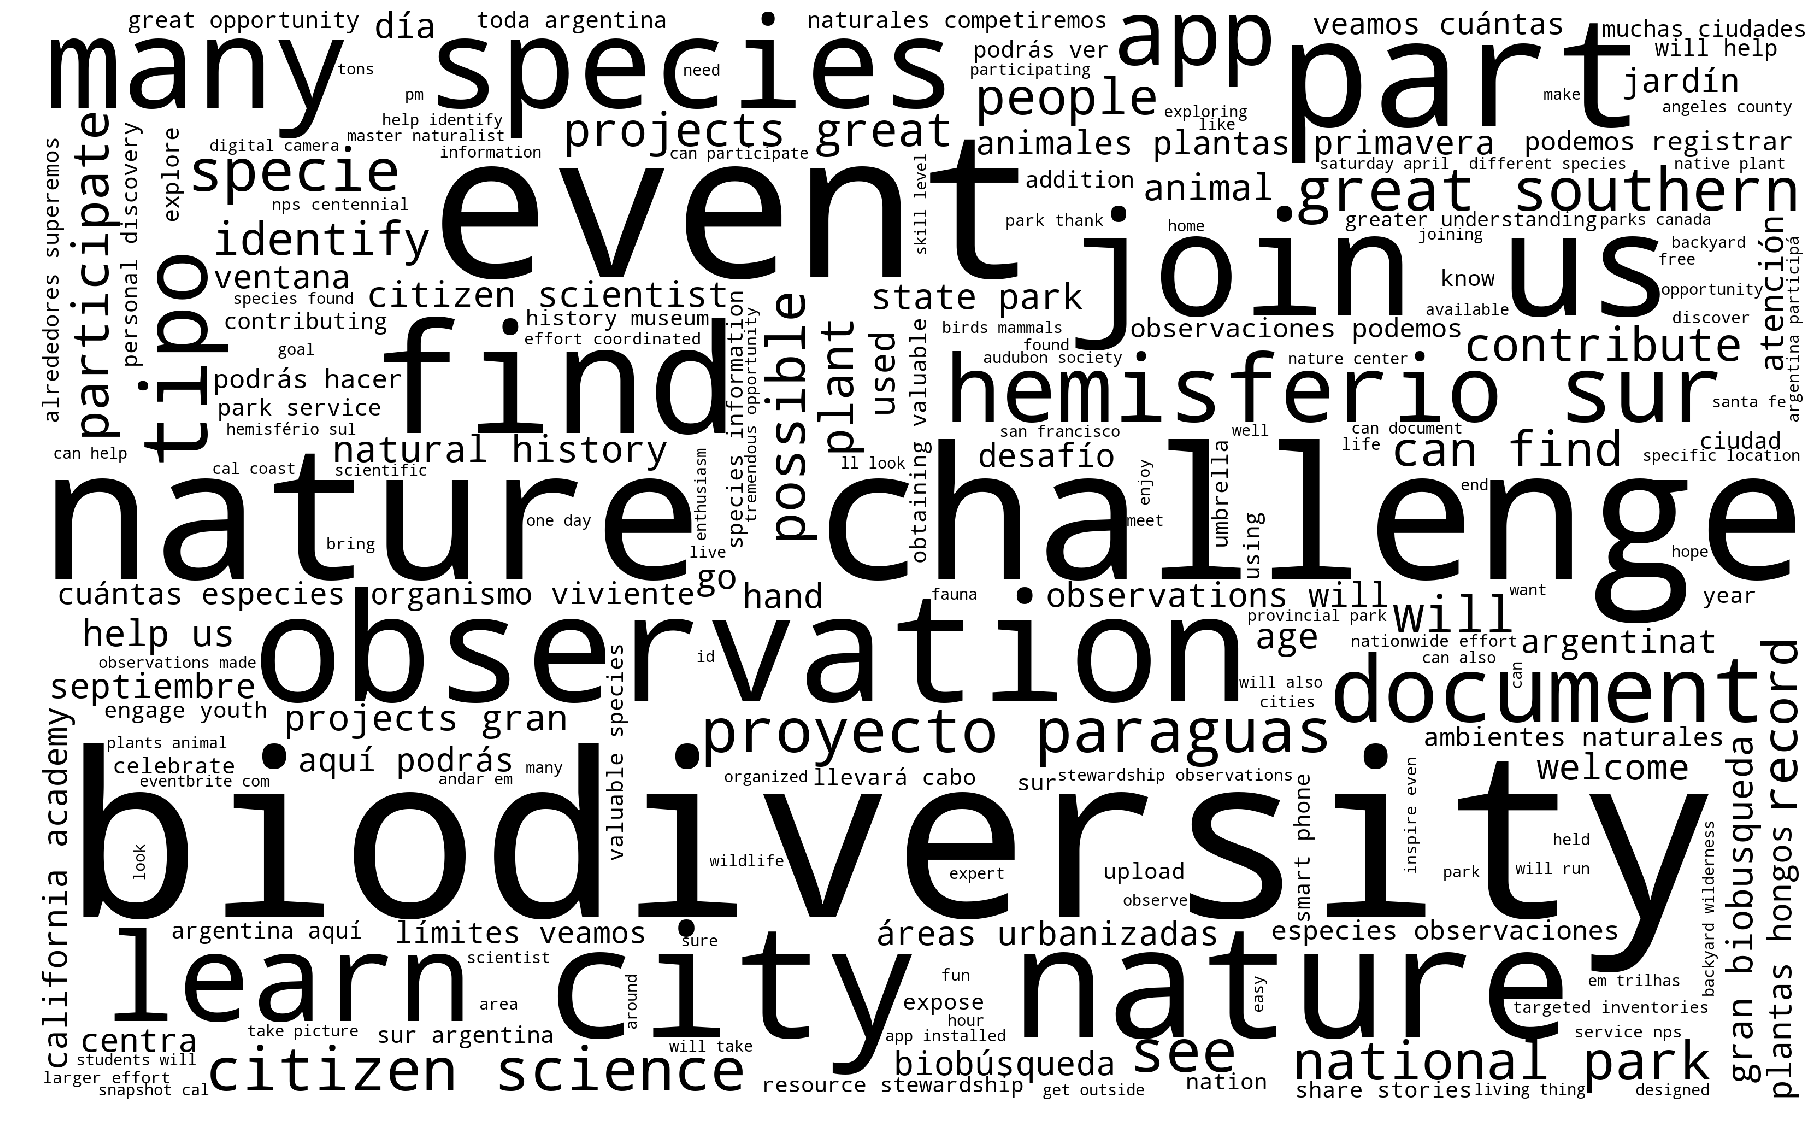

In [23]:
# iterate through the csv file 
for val in df.description: 

    # typecaste each val to string 
    val = str(val) 
    val = cleanhtml(val)
    # split the value 
    tokens = val.split() 
    #print(tokens)      
    # Converts each token into lowercase 
    for i in range(len(tokens)):

        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 3236, height = 2000, 
                background_color ='white', 
                stopwords = stopwords, 
                #normalize_plurals = False,
                color_func=lambda *args, **kwargs: (0,0,0),
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (25, 25), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [28]:
wordcloud.to_file("wordcloud.tif")